In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
match_data = pd.read_csv('./IPL_Matches_2008_2022.csv')
ball_data = pd.read_csv('./IPL_Ball_by_Ball_2008_2022.csv')

In [3]:
match_data.tail()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
941,335986,Kolkata,20-04-2008,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
942,335985,Mumbai,20-04-2008,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
943,335984,Delhi,19-04-2008,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
944,335983,Chandigarh,19-04-2008,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri
945,335982,Bangalore,18-04-2008,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,N,Kolkata Knight Riders,Runs,140.0,NaN,BB McCullum,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",Asad Rauf,RE Koertzen


In [4]:
# checking the number of null observations
match_data.isnull().sum()

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            0
WinningTeam          0
WonBy                0
Margin              14
method             927
Player_of_Match      0
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

In [5]:
ball_data.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [6]:
# checking the number of null observations
ball_data.isnull().sum()

ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64

In [7]:
# number of rows and columns in match_data
match_data.shape

(946, 20)

In [8]:
# number of rows and columns in ball_data
ball_data.shape

(225954, 17)

In [9]:
# Columns in match_data
match_data.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')

In [10]:
print('Matches played so far:', match_data.shape[0])
print('\n Cities played at:', match_data['City'].unique())
print('\n Teams Participated:', match_data['Team1'].unique())

Matches played so far: 946

 Cities played at: ['Ahmedabad' 'Kolkata' 'Mumbai' 'Navi Mumbai' 'Pune' 'Dubai' 'Sharjah'
 'Abu Dhabi' 'Delhi' 'Chennai' nan 'Hyderabad' 'Visakhapatnam'
 'Chandigarh' 'Bengaluru' 'Jaipur' 'Indore' 'Bangalore' 'Kanpur' 'Rajkot'
 'Raipur' 'Ranchi' 'Cuttack' 'Dharamsala' 'Kochi' 'Nagpur' 'Johannesburg'
 'Centurion' 'Durban' 'Bloemfontein' 'Port Elizabeth' 'Kimberley'
 'East London' 'Cape Town']

 Teams Participated: ['Rajasthan Royals' 'Royal Challengers Bangalore' 'Sunrisers Hyderabad'
 'Delhi Capitals' 'Chennai Super Kings' 'Gujarat Titans'
 'Lucknow Super Giants' 'Kolkata Knight Riders' 'Punjab Kings'
 'Mumbai Indians' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rising Pune Supergiant' 'Gujarat Lions' 'Rising Pune Supergiants'
 'Pune Warriors' 'Deccan Chargers' 'Kochi Tuskers Kerala']


In [11]:
## Adding a new column to the dataframe containing the year when the matches were played

# extracting the year from the Date Column and adding to a new column named 'Season'
match_data['Season'] = pd.DatetimeIndex(match_data['Date']).year
match_data.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,29-05-2022,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,27-05-2022,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,25-05-2022,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,24-05-2022,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,22-05-2022,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


## Matches held per Season

In [12]:

match_per_season = match_data.groupby(['Season'])['ID'].count().reset_index().rename(columns={'ID':'Matches'})
match_per_season

,Season,Matches
0,2008,58
1,2009,57
2,2010,60
3,2011,72
4,2012,74
5,2013,76
6,2014,60
7,2015,57
8,2016,60
9,2017,59


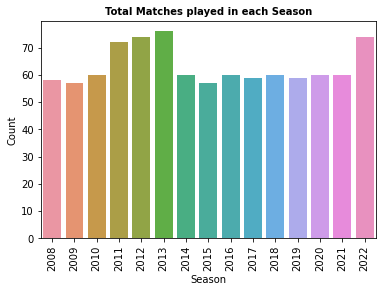

In [13]:
sns.countplot(x=match_data['Season'])
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Season', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Total Matches played in each Season', fontsize=10,fontweight = 'bold')
plt.show()

In [14]:
season_data = match_data[['ID','Season']].merge(ball_data, left_on = 'ID', right_on = 'ID', how = 'left').drop('ID',axis=1)

In [15]:
season_data

,Season,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,2022,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,2022,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,2022,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,2022,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,2022,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225577,2008,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225578,2008,2,14,6,SB Joshi,I Sharma,P Kumar,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225579,2008,2,14,7,P Kumar,I Sharma,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225580,2008,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


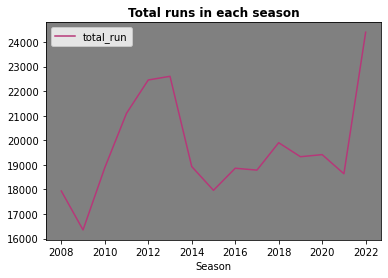

In [16]:
## Total runs scored in each season
season = season_data.groupby(['Season'])['total_run'].sum().reset_index()
p = season.set_index('Season')
ax = plt.axes()
ax.set(facecolor = 'grey')
sns.lineplot(data=p, palette='magma')
plt.title('Total runs in each season', fontsize=12, fontweight='bold')
plt.show()

# Most Wins in IPL



In [17]:

count_wins = match_data["WinningTeam"].value_counts()



In [18]:
count_wins

Mumbai Indians                 131
Chennai Super Kings            121
Kolkata Knight Riders          114
Royal Challengers Bangalore    109
Rajasthan Royals                96
Kings XI Punjab                 88
Sunrisers Hyderabad             75
Delhi Daredevils                67
Delhi Capitals                  36
Deccan Chargers                 29
Punjab Kings                    13
Gujarat Lions                   13
Gujarat Titans                  12
Pune Warriors                   12
Rising Pune Supergiant          10
Lucknow Super Giants             9
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: WinningTeam, dtype: int64

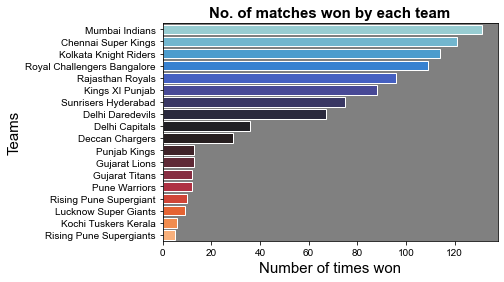

In [19]:
ax = plt.axes()
ax.set(facecolor = 'grey')
sns.set(rc={'figure.figsize':(8,8)}, style = 'darkgrid')
ax.set_title('No. of matches won by each team', fontsize=15, fontweight='bold')
sns.barplot(y=count_wins.index, x=count_wins, orient='h', palette= 'icefire', saturation=1)
plt.xlabel("Number of times won", fontsize = 15)
plt.ylabel("Teams", fontsize = 15)
plt.show()

## Toss Decision across different seasons

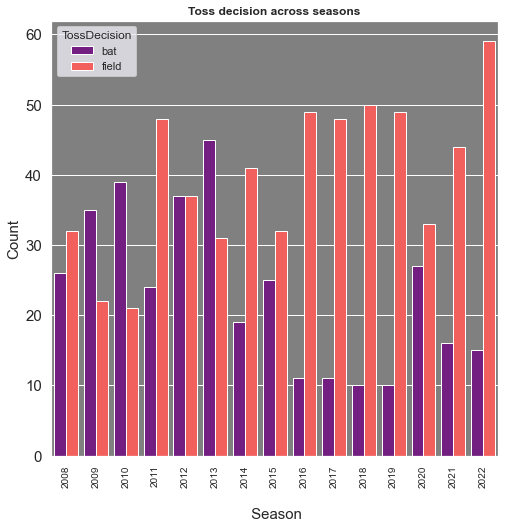

In [20]:
toss = match_data['TossWinner'].value_counts()
ax = plt.axes()
ax.set(facecolor = 'grey')
sns.set(rc={'figure.figsize':(12,8)})
sns.countplot(x='Season', hue='TossDecision', data=match_data, palette = 'magma', saturation=1)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('\n Season', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Toss decision across seasons', fontsize=12, fontweight='bold')
plt.show()

In [21]:
# How many matches won by team batting first and team batting second
match_data.WonBy.value_counts()

Wickets      509
Runs         423
SuperOver     14
Name: WonBy, dtype: int64

### 509 matches were won by teams that were chasing the score
### 423 matches were won by the teams that batted first
### 14 matches went into the superover

In [22]:
# Which venue is best for winning by wickets
match_data.Venue[match_data.WonBy!='Runs'].mode()

0    Eden Gardens
dtype: object

In [23]:
# Which venue is best for winning by runs
match_data.Venue[match_data.WonBy!='Wickets'].mode()

0    Wankhede Stadium
dtype: object

In [24]:
 ### For any given IPL team, which stadium is best when they win the toss

match_data.Venue[match_data.TossWinner=='Rajasthan Royals'][match_data.WinningTeam=='Rajasthan Royals'].mode()

0    Sawai Mansingh Stadium
dtype: object

In [25]:
### Team which has won maximum number of matches batting second(best chasing team)

match_data.WinningTeam[match_data.WonBy!='runs'].mode()

0    Mumbai Indians
dtype: object

In [26]:
### Team which has won maximum number of matches batting first (best defending team)

match_data.WinningTeam[match_data.WonBy!='Wickets'].mode()

0    Mumbai Indians
dtype: object

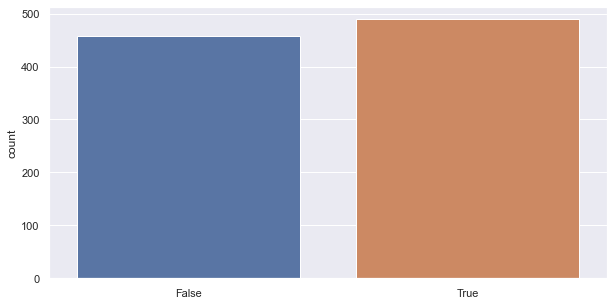

In [27]:
### Does winning the toss means winning the match
toss1 = match_data['TossWinner'] == match_data['WinningTeam']
plt.figure(figsize=(10,5))
sns.countplot(x=toss1)
plt.show()

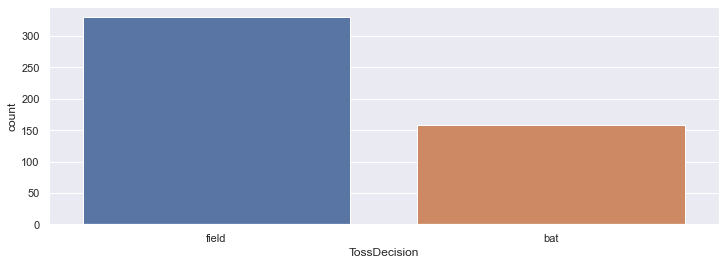

In [28]:
### Does batting or bowling first help in winning matches
plt.figure(figsize=(12,4))
sns.countplot(x= match_data.TossDecision[match_data.TossWinner == match_data.WinningTeam])
plt.show()

### Performance of a player throughout IPL

In [48]:
df_dhoni = ball_data[ball_data.batter=='MS Dhoni']
df_dhoni.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
1508,1304114,1,10,3,MS Dhoni,YS Chahal,MM Ali,NaN,0,0,0,0,0,NaN,NaN,NaN,Chennai Super Kings
1509,1304114,1,10,4,MS Dhoni,YS Chahal,MM Ali,NaN,0,0,0,0,0,NaN,NaN,NaN,Chennai Super Kings
1510,1304114,1,10,5,MS Dhoni,YS Chahal,MM Ali,NaN,0,0,0,0,0,NaN,NaN,NaN,Chennai Super Kings
1511,1304114,1,10,6,MS Dhoni,YS Chahal,MM Ali,NaN,1,0,1,0,0,NaN,NaN,NaN,Chennai Super Kings
1512,1304114,1,11,1,MS Dhoni,TA Boult,MM Ali,NaN,1,0,1,0,0,NaN,NaN,NaN,Chennai Super Kings


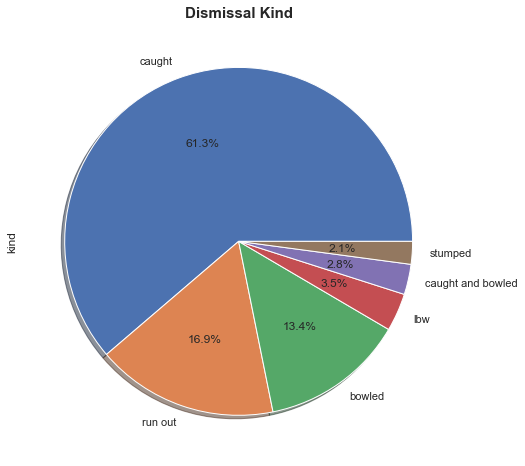

In [49]:
### Dismisaal kind for a Player

df_dhoni['kind'].value_counts().plot.pie(autopct= '%1.1f%%', shadow=True)
plt.title('Dismissal Kind', fontweight='bold',fontsize=15)
plt.show()

In [63]:
def count(player,runs):
    return len(player[player['batsman_run']==runs])*runs

In [64]:
print("Runs scored from 1's :", count(df_dhoni,1))
print("Runs scored from 2's :", count(df_dhoni,2))
print("Runs scored from 3's :", count(df_dhoni,3))
print("Runs scored from 4's :", count(df_dhoni,4))
print("Runs scored from 6's :", count(df_dhoni,6))

Runs scored from 1's : 1509
Runs scored from 2's : 666
Runs scored from 3's : 45
Runs scored from 4's : 1384
Runs scored from 6's : 1374


In [68]:
# match which was won by a large margin
match_data[match_data['Margin']==match_data['Margin'].max()]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
328,1082635,Delhi,06-05-2017,2017,45,Delhi Daredevils,Mumbai Indians,Feroz Shah Kotla,Delhi Daredevils,field,N,Mumbai Indians,Runs,146.0,NaN,LMP Simmons,"['SV Samson', 'KK Nair', 'SS Iyer', 'RR Pant',...","['LMP Simmons', 'PA Patel', 'KA Pollard', 'RG ...",Nitin Menon,CK Nandan


In [81]:
# players scored maximum number of runs in ipl
runs = season_data.groupby(['batter'])['batsman_run'].sum().reset_index()
runs.columns = ['Batsman','runs']

Top_10 = runs.sort_values(by='runs', ascending=False).head(10).reset_index().drop('index', axis=1)
Top_10

,Batsman,runs
0,V Kohli,6607
1,S Dhawan,6244
2,RG Sharma,5881
3,DA Warner,5864
4,SK Raina,5536
5,AB de Villiers,5114
6,CH Gayle,4986
7,MS Dhoni,4978
8,RV Uthappa,4954
9,KD Karthik,4350


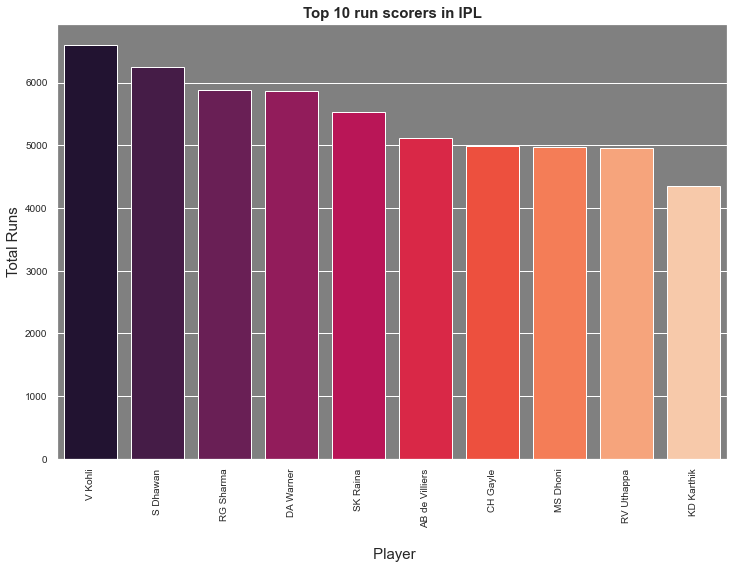

In [82]:
ax = plt.axes()
ax.set(facecolor = 'grey')
sns.barplot(x=Top_10['Batsman'], y=Top_10['runs'], palette='rocket', saturation=1)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('\n Player', fontsize=15)
plt.ylabel('Total Runs', fontsize=15)
plt.title('Top 10 run scorers in IPL', fontsize=15, fontweight='bold')
plt.show()

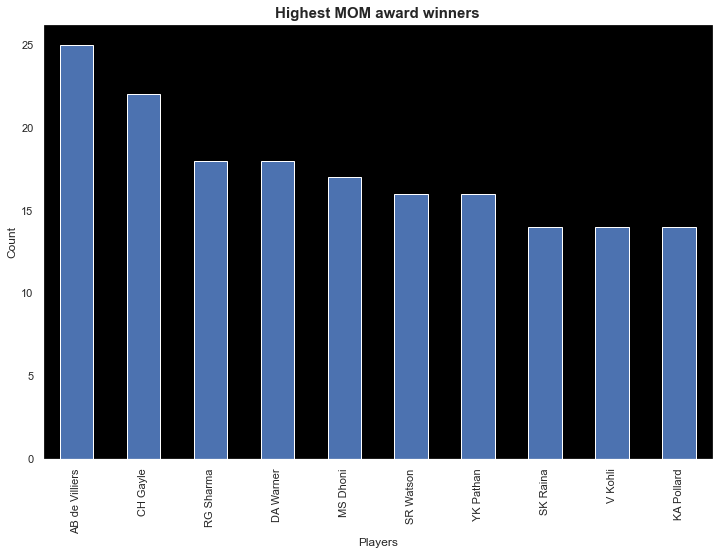

In [90]:
ax = plt.axes()
ax.set(facecolor = 'black')
match_data.Player_of_Match.value_counts()[:10].plot(kind='bar', grid=False)
plt.xlabel('Players')
plt.ylabel('Count')
plt.title('Highest MOM award winners', fontsize=15,fontweight='bold')
plt.show()

In [89]:
match_data.Player_of_Match.value_counts()[:10]

AB de Villiers    25
CH Gayle          22
RG Sharma         18
DA Warner         18
MS Dhoni          17
SR Watson         16
YK Pathan         16
SK Raina          14
V Kohli           14
KA Pollard        14
Name: Player_of_Match, dtype: int64